## TP 4 : " Reaction - Diffusion Model ".

---
Binôme : Khaled Ibrahim & Servranckx Christophe.

---


Pour ce 4ème travail personnel, nous allons nous intéresser au modèle Gray-scott et à son système d'équations.


Le modèle Gray-Scott, comme nous l'avons vu dans l'introduction de ce TP, représente la réaction et la diffusion de deux espèces chimique générique que l'on notera U et V. 


Dès lors, l'objectif sera ici, sous certaine condition initiales (CI) et au bords (CB), de simuler l'interaction des deux espèces chimique qui réagissent entre-elle et se diffusent.


Pour se faire, nous aurons à discrétiser le système d'équation différentiel partielle (EDP) selon une discrétisation *forward* pour le temps et *centrale* pour l'espace et à implémenter notre système à deux dimensions comme nous l'avons fait tout au long de ce 4ème module.

---

##### 1. Rappel et développement théorique.
---

Comme nous l'avons vu, le modèle de Gray-Scott suit quelque règles qui permettent alors d'en déduire les EDP, reprises ci-dessous, pour les concentrations $u(x,y,t)$ et $v(x,y,t)$ des deux espèces chimiques U et V correspondante.


\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla ^2 u - uv^2 + F(1-u)\\
\frac{\partial v}{\partial t} &= D_v \nabla ^2 v + uv^2 - (F + k)v
\end{align}

avec, à gauche de ces égalités :     

* Les termes représentant la variation temporelle de la concentration de chaque espèce:  $\frac{\partial u}{\partial t} $ et $\frac{\partial v}{\partial t}$ 

et à droites :

* 1er terme : les termes de diffusion de chaque concentration où $Du$ et $Dv$ sont les taux respectif de diffusion et $\nabla^2$ le laplacien en coordonnée cartésienne à deux dimension.

* 2ème terme : les termes liés à la probabilité de trouver une espèce U ou V en fonction de sa concentration. C'est-à-dire, pour une molécule de l'espèce U, la probabilité de la trouver est proportionnel à $u$ tandis que pour une molécule de l'espèce V, cette probabilité est proportionnel à $v^2$ 

* dernier terme : les termes d'alimentation et de destruction des deux espèces chimiques. 

Notons enfin que les valeurs de $F$ et $k$ sont choisies comme paramètres et que le résultat de notre analyse découle du choix de ces derniers.

Pour la résolution de ce problème, il nous faudra tout d'abord discrétiser nos équations (1) et (2), nous discrétiserons ensuite les conditions aux bords de notre domaine qui ne sont autres que des CB de Neumann.

---

##### 2. Discrétisation des équations de réaction - diffusion et des conditions aux bords.
---

Nous disposons donc des équations,

\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla ^2 u - uv^2 + F(1-u)\\
\frac{\partial v}{\partial t} &= D_v \nabla ^2 v + uv^2 - (F + k)v
\end{align}

qu'il nous faut discrétiser. Comme indiqué dans l'énoncé de ce TP, nous discrétisons les équations de réaction-diffusion en utilisant les discrétisations *forward-time* et *centered-space*. Procédons tout d'abord à la discrétisation de l'équation (1).


---

#### 2.1 Discrétisation de l'équation (1).
---

Commençons par la discrétisation des dérivées temporelle et spatiale.

* Forward-time : 

$$ \frac{\partial u}{\partial t} \approx \frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} $$

* centered-space : 

$$ \nabla ^2 u \approx \frac{u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}}{\Delta x^2} + \frac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}}{\Delta y^2} $$

$\hspace{0.8cm}$ ou en supposant que $ \Delta x = \Delta y = \delta$. 

$$→  \nabla ^2 u \approx \frac{1}{\delta ^2} \left[ \left( u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j} \right) + \left( u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1} \right) \right]$$

$\mbox{ }$

Notre équation discrétisée est ainsi donnée par :

$$
\begin{array}{}
\frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} = \frac{D_u}{\delta ^2} \left[ \left( u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j} \right) + \left( u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1} \right) \right] - u^{n}_{i,j} \left( v^n_{i,j} \right) ^2 + F \left(1-u^{n}_{i,j} \right) 
\end{array}
$$

Où la seule inconnue est $u^{n+1}_{i,j}$. Dès lors, en isolant cette inconnue dans le membre de gauche:

$$
\begin{array}{}
u^{n+1}_{i,j}= u^{n}_{i,j} + \frac{D_u \Delta t}{\delta ^2} \left[ \left( u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j} \right) + \left( u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1} \right) \right] - \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^n_{i,j} \right) ^2 + \Delta{t} \mbox{ } F \left(1-u^{n}_{i,j} \right)
\end{array}
$$

et en réarrangant quelque peu cette équation, nous obtenons :

$$
\begin{array}{}
\hspace{-3.0cm} u^{n+1}_{i,j} = \frac{D_u \Delta t}{\delta ^2} \left( u^{n}_{i+1,j} + u^{n}_{i-1,j} + u^{n}_{i,j+1} + u^{n}_{i,j-1} \right) + \left[ 1- \frac{4 D_u \Delta t}{\delta ^2} - \Delta{t} \mbox{ } \left( v^n_{i,j} \right) ^2 - \Delta{t} \mbox{ } F \right] u^{n}_{i,j} + \Delta{t} \mbox{ } F 
\end{array}
$$
 
Finalement, en posant $c_1 = \frac{D_u \Delta t}{\delta ^2}$, il en découle l'équation suivante:

$$
\begin{equation}
\hspace{-2.0cm} u^{n+1}_{i,j} = \Delta{t} \mbox{ } F + \left[ 1- 4 c_1 - \Delta{t} \mbox{ } \left( v^n_{i,j} \right) ^2 - \Delta{t} \mbox{ } F \right] u^{n}_{i,j} \hspace{0.9cm} + c_1 \left( u^{n}_{i+1,j} + u^{n}_{i-1,j} + u^{n}_{i,j+1} + u^{n}_{i,j-1} \right)
\end{equation}
$$

---

#### 2.2 Discrétisation de l'équation (2).
---

Nous procédons de manière identique à ce que nous venons d'éffectuer pour l'équation (1), e.g., nous commençons par discrétiser les dérivées temporelle et spatiale,

* Forward-time : 

$$ \frac{\partial v}{\partial t} \approx \frac{v^{n+1}_{i,j} - v^{n}_{i,j}}{\Delta t} $$

* centered-space : 

$$ \nabla ^2 v \approx \frac{v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j}}{\Delta x^2} + \frac{v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1}}{\Delta y^2} $$

$\hspace{0.8cm}$ Or, $ \Delta x = \Delta y = \delta$.

$$→  \nabla ^2 v \approx \frac{1}{\delta ^2} \left[ \left( v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j} \right) + \left( v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1} \right) \right]$$


$\mbox{}$


qui nous donne,

$$ 
\begin{array}{}
\frac{v^{n+1}_{i,j} - v^{n}_{i,j}}{\Delta t} = \frac{D_v}{\delta ^2} \left[ \left( v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j} \right) + \left( v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1} \right) \right] + u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 - \left(F+k \right) v^{n}_{i,j}
\end{array}
$$

En isolant la seule inconnue $v^{n+1}_{i,j}$, nous avons alors:

$$ 
\begin{array}{}
v^{n+1}_{i,j} = v^{n}_{i,j} + \frac{D_v \Delta t}{\delta ^2} \left[ \left( v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j} \right) + \left( v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1} \right) \right] + \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 - \Delta{t} \left(F+k \right) v^{n}_{i,j} 
\end{array}
$$

qui devient après un réarrangement et en posant $c_2 = \frac{D_v \Delta t}{\delta ^2}$ :

$$
\begin{equation}
\hspace{-3.0cm} v^{n+1}_{i,j} = \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 + \left[ 1- 4 c_2 - \Delta{t} \mbox{ } \left( F+k \right)  \right] v^{n}_{i,j} \hspace{3.5cm} + c_2 \left( v^{n}_{i+1,j} + v^{n}_{i-1,j} + v^{n}_{i,j+1} + v^{n}_{i,j-1} \right) 
\end{equation}
$$

$\mbox{}$

Cette deuxième équation étant discrétisée, il ne nous reste plus qu'à discrétiser nos conditions aux bords.

---

#### 2.3 Conditions aux bords.
---


Pour notre problème, comme annoncé précédemment, les 4 bords du domaines sont soumis à la même CB à savoir, une CB de Neumann nulle. Or comme nous l'avons vu au fil des leçons de ce module, nous  pouvons approximer les CB de Neumann par des différences finies. Nous avons donc:

$$
\left\{
\begin{array}{}
\frac{\partial u}{\partial x} = \frac{\partial u}{\partial y} = q\\
\frac{\partial v}{\partial x} = \frac{\partial v}{\partial y} = q
\end{array}
\right.
$$

où $q=0$ (ce qui correspond à une paroie qui isole notre système de son environnement). 

Ainsi, à chaque pas de temps, nous avons (en se souvenant que $ \Delta x = \Delta y = \delta$):

* Pour u :

$$
\left\{
\begin{array}{}
\frac{\partial u}{\partial x} \approx \frac{u_{end,j} - u_{end-1,j}}{\Delta x} = q = 0 \mbox{ } → \mbox{ } u_{end,j} = u_{end-1,j}\\
\frac{\partial u}{\partial x} \approx \frac{u_{i,end} - u_{i,end-1}}{\Delta y} = q =0 \mbox{ } → \mbox{ } u_{i,end} = u_{i,end-1}
\end{array}
\right.
$$

* Pour v :

$$
\left\{
\begin{array}{}
\frac{\partial v}{\partial x} \approx \frac{v_{end,j} - v_{end-1,j}}{\Delta x} = q \mbox{ } → \mbox{ } v_{end,j} = v_{end-1,j}\\
\frac{\partial v}{\partial x} \approx \frac{v_{i,end} - v_{i,end-1}}{\Delta y} = q \mbox{ } → \mbox{ } v_{i,end} = v_{i,end-1}
\end{array}
\right.
$$

où les indices "end-1" correspondent à l'avant dernier indice de ligne ou de colonne.

---

#### 2.4 Récapitulatif.
---

Nous avons finalement réussi à discrétiser nos équations de réaction-diffusion ainsi que nos conditions aux bords que l'on a réunit ci-dessous:

* Equations de réaction-diffusion :

$$
\left\{
\begin{array}{}
u^{n+1}_{i,j} = \Delta{t} \mbox{ } F + \left[ 1- 4 c_1 - \Delta{t} \mbox{ } \left( v^n_{i,j} \right) ^2 - \Delta{t} \mbox{ } F \right] u^{n}_{i,j} \hspace{3.0cm} + c_1 \left( u^{n}_{i+1,j} + u^{n}_{i-1,j} + u^{n}_{i,j+1} + u^{n}_{i,j-1} \right)  \\
v^{n+1}_{i,j} = - \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 + \left[ 1- 4 c_2 - \Delta{t} \mbox{ } \left( F+k \right)  \right] v^{n}_{i,j} \hspace{3.0cm} + c_2 \left( v^{n}_{i+1,j} + v^{n}_{i-1,j} + v^{n}_{i,j+1} + v^{n}_{i,j-1} \right)
\end{array}
\right.
$$

* Conditions aux bords de Neumann :

$$
\left\{
\begin{array}{}
u_{end,j} = u_{end-1,j} + q \delta\\
u_{i,end} = u_{i,end-1} + q \delta\\
v_{end,j} = v_{end-1,j} + q \delta\\
v_{i,end} = v_{i,end-1} + q \delta 
\end{array}
\right.
$$

Maintenant que nous disposons des bases essentielles à notre problème, passons à sa résolution.

---

##### 3. Résolution du problème et analyse.
---

Comme à notre habitude, commençons par importer les librairies dont nous auront besoins.

In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
import matplotlib.cm as cm

Nous initialisons ensuite les données du problème tel que le temps de simulation, le nombre de points de notre grille spatiale ou encore les taux de diffusion $D_u$ et $D_v$.

In [2]:
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

n  = 192       # Nombre de points de la grille spatiale x et y
dh = 5/(n-1)   # dh correspond au petit delta de nos équations
T  = 8000      # Temps final de simulation
dt = .9 * dh**2 / (4*max(Du,Dv))   # pas de temps 
nt = int(T/dt) # Nombre de points de la grille temporelle
L  = 5         # Longueur des bords de notre domaine carré

c1 = Du*dt/(dh**2)   
c2 = Dv*dt/(dh**2)   

Pour les conditions initiales (valeurs initiales des concentrations de U et de V), nous téléchargons le fichier reprenant les codes qui génèrent la configuration initiale de notre domaine.

Nous utilisons ensuite la fonction "$load()$" proposé par numpy, pour extraire du fichier que nous venons de télécharger notre configuration initiale.

In [3]:
uvinitial = numpy.load('./data/uvinitial.npz')
U = uvinitial['U']  # Extrait les concentrations de U pour tout point de notre domaine
V = uvinitial['V']  # Extrait les concentrations de V pour tout point de notre domaine

Nous pouvons à présent vérifier que notre configuration initiale ai correctement été extraite et implémentée en réalisant deux graphiques de celle-ci. Un premier pour l'espèce U et un second pour l'espèce V.

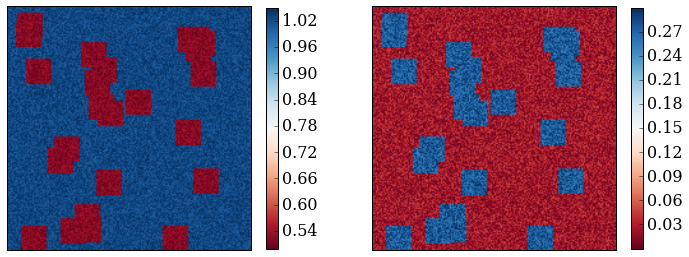

In [4]:
fig = pyplot.figure(figsize=(12,9))

pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.colorbar(shrink=.48);
pyplot.xticks([]), pyplot.yticks([]);

pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.colorbar(shrink=.48);
pyplot.xticks([]), pyplot.yticks([]);

Nous voyons agréablement que notre configuration initiale à correctement été implémentée. Notons tout de même que la réalisation de deux graphiques qui représentent exactement la même situation peut parraître inutile, toutefois elle nous permet de vérifier qu'il n'y a pas d'autre espèce que les espèces U et V dans notre domaine et donc que notre implémentation ai correctement été effectuée.

Nous allons maintenant définir la fonction qui va résoudre nos équations par la méthode d'Euler qui, pour rappel, est une méthode de résolution par itération sur le temps. 

Notre fonction prendra donc en entrée, les valeurs initiales de U et de V ainsi que les paramètres du problème (avec c1 et c2 nos constantes définies plus haut).

Une boucle for se chargera ensuite d'itéré sur le temps. À l'intérieur de cette dernière, une copie des valeurs de U et de V en tout point de notre domaine sera effectué afin de mettre à jour ces dernières. Viendront ensuite nos équations discrétisées et enfin l'imposition de nos conditions aux bords de Neumann.

En outre, notre fonction nous retournera un tableau de deux composantes : une première avec le tableau des valeurs de u et une seconde pour celles de v et ce pour le temps final $T=8000s$.

Voici donc notre fonction qui implémente ce que nous venons d'expliquer.

In [5]:
def ftcs(U, V, nt, c1, c2, F, k, dt):
    
    for t in range(nt):
        Un = U.copy()
        Vn = V.copy()
        
        U[1:-1,1:-1] = ((1-4*c1-dt*(Vn[1:-1,1:-1])**2-dt*F)* Un[1:-1,1:-1])\
             + c1*(Un[1:-1,2:] + Un[1:-1,:-2] + Un[2:,1:-1] + Un[:-2,1:-1])\
             + (dt*F) 
       
        V[1:-1,1:-1] = ((1-4*c2-dt*(F+k))* Vn[1:-1,1:-1])\
             + (dt*Un[1:-1,1:-1]*((Vn[1:-1,1:-1])**2))\
             + c2*(Vn[1:-1,2:] + Vn[1:-1,:-2] + Vn[2:,1:-1] + Vn[:-2,1:-1])
        
        # On impose des conditions aux bords de Neumann
    
        # Bord supérieur
        U[-1,:] = U[-2,:]
        V[-1,:] = V[-2,:]
        
        # Bord inférieur
        U[0,:]  = U[1,:]
        V[0,:]  = V[1,:]
        
        # Bord droit
        U[:,-1] = U[:,-2]
        V[:,-1] = V[:,-2]
        
        # Bord gauche
        U[:,0]  = U[:,1]
        V[:,0]  = V[:,1]

    return numpy.array([U,V])

Notre fonction étant définie, nous pouvons alors faire appel à elle afin de trouver nos solutions.

In [6]:
s = ftcs(U, V, nt, c1, c2, F, k, dt)   # Appel de notre fonction

Il ne nous reste alors qu'a ressortir les valeurs recherchées.
Pour se faire, nous stockons les valeurs de u renvoyées par notre fonction dans un tableau (qui sera ici uf) qui n'est autre que la composante 0 du tableau de sortie s. Ensuite, comme demandé dans l'énoncé, nous ressortons 5 valeurs prises à la 100ème ligne du tableau u en comptant par pas de 40.

In [7]:
uf = s[0]   # Valeurs de la concentration de l'espèce U au temps final

# On ressort les 5 valeurs recherchées
j = uf[100,::40]   

print("Concentrations de l'espèce U en les points recherchés:")
print("")

for i in range(5):
    if i<1:
        print("→ Le",i+1,"er chiffre recherché est :",round(j[i],4))
    elif i<=2:
        print("→ Le",i+1,"ème chiffre recherché est :",round(j[i],4))
    else:    
        print("→ Le",i+1,"ème chiffre recherché est :",round(j[i],5))

Concentrations de l'espèce U en les points recherchés:

→ Le 1 er chiffre recherché est : 0.9247
→ Le 2 ème chiffre recherché est : 0.8501
→ Le 3 ème chiffre recherché est : 0.6682
→ Le 4 ème chiffre recherché est : 0.90196
→ Le 5 ème chiffre recherché est : 0.90395


Ce qui s'avèrent-être les valeurs exactes (vis à vis des valeurs indiquées sur le site : http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/info).

Afin de mieux se rendre compte de l'état de notre système, nous pouvons alors esquisser l'état de notre système au temps final $T=8000s$.

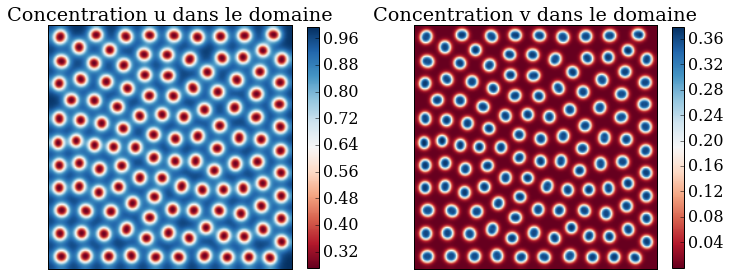

In [8]:
fig = pyplot.figure(figsize=(12,9))

pyplot.subplot(121)
pyplot.title("Concentration u dans le domaine")
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.colorbar(shrink=.48);

pyplot.subplot(122)
pyplot.title("Concentration v dans le domaine")
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.colorbar(shrink=.48);

Nous voyons donc par le biais de ces deux graphiques, la concentration en l'espèce U (graphique de gauche) et la concentration de l'espèce V en tout point du domaine.

Vis à vis de la configuration initiale, nous voyons que le domaine devient de moins en moins concentré en l'espèce U mais de plus en plus concentré en l'espèce V. Ceci correspond à nos attentes d'avoir une espèce V majoritaire dans le domaine étant donné la série de règle que doit suivre le modèle de Gray-Scott avec notamment :

$$
\begin{array}{}
2V+U\rightarrow 3V
\end{array}
$$

qui représente la "transformation" par deux unités de l'espèce V, d'une unité de l'espèce U en trois unités de l'espèce V.

Une animation pourrait alors mieux rendre compte de l'évolution de notre système au cours du temps. C'est précisémment ce que nous allons effectuer dans la section 5 de ce travail consacrée aux animations.

Avant cela, attardons nous un peu plus sur les résultats obtenus. Que nous renseignent-ils ? 

Comme nous l'avons dit, il s'agit des concentrations de l'espèce U en les points demandés. Mais quelles sont les valeurs de la concentration de l'espèce V ? Y a t'il conservation de "la quantité de matière" dans le domaine ?

Pour répondre a ces deux questions, nous commençons par ressortir les valeurs de la concentration de l'espèce V de manière similaire a ce que nous avons réaliser pour l'espèce U, e.g. nous stockons les valeurs de v dans un tableau etc.
Nous avons donc :

In [9]:
vf = s[1]   # Valeurs de la concentration de l'espèce V au temps final

# On ressort les 5 valeurs recherchées de v
h = vf[100,::40]
   
print("Concentrations de l'espèce V en les points recherchés:")
print("")    

for i in range(5):
    if i<1:
        print("→ Le",i+1,"er chiffre recherché est :",round(h[i],4))
    elif i<=2:
        print("→ Le",i+1,"ème chiffre recherché est :",round(h[i],4))
    else:    
        print("→ Le",i+1,"ème chiffre recherché est :",round(h[i],5))

Concentrations de l'espèce V en les points recherchés:

→ Le 1 er chiffre recherché est : 0.0018
→ Le 2 ème chiffre recherché est : 0.0198
→ Le 3 ème chiffre recherché est : 0.1177
→ Le 4 ème chiffre recherché est : 0.00679
→ Le 5 ème chiffre recherché est : 0.00694


Dès lors, si nous sommons ces deux concentrations, nous nous attendons à obtenir une valeur égale à l'unité en chacun des points.

NB : Nous faisons ici l'hypothèse que les volumes sont additifs.

In [10]:
print("concentrations en les espèces U et V aux points recherchés:")
print("")  

for i in range(5):
    if i<1:
        print("→ Le",i+1,"er chiffre recherché est :",round(j[i]+h[i],4))
    elif i<=2:
        print("→ Le",i+1,"ème chiffre recherché est :",round(j[i]+h[i],4))
    else:    
        print("→ Le",i+1,"ème chiffre recherché est :",round(j[i]+h[i],5))

concentrations en les espèces U et V aux points recherchés:

→ Le 1 er chiffre recherché est : 0.9265
→ Le 2 ème chiffre recherché est : 0.8699
→ Le 3 ème chiffre recherché est : 0.7859
→ Le 4 ème chiffre recherché est : 0.90876
→ Le 5 ème chiffre recherché est : 0.91089


---

##### 4. Etude des patterns 
---

On commence par changer les valeurs de k en maintenant les autres paramètres fixe. Prenons une valeur de 0.060 et on montons de 0.001 jusqu'à la valeur 0.065 correspondant au parramètre du problème.


In [11]:
k = numpy.array([0.060,0.061,0.062,0.063,0.064,0.065])

In [12]:
def ftcs(U, V, nt, c1, c2, F, q, dt):
    
    for n in range(nt):
        Un = U.copy()
        Vn = V.copy()
        
        U[1:-1,1:-1] = c1*(Un[1:-1,2:] + Un[1:-1,:-2] + Un[2:,1:-1] + Un[:-2,1:-1]) + (1-4*c1-dt*(Vn[1:-1,1:-1])**2-dt*F)* Un[1:-1,1:-1]+ dt*F
       
        V[1:-1,1:-1] = c2*(Vn[1:-1,2:] + Vn[1:-1,:-2] + Vn[2:,1:-1] + Vn[:-2,1:-1]) + ((1-4*c2-dt*(F+q))* Vn[1:-1,1:-1]) + (dt*Un[1:-1,1:-1]*((Vn[1:-1,1:-1])**2))
  
        # Enforce Neumann BCs
    
        # Bord supérieur
        U[-1,:] = U[-2,:]
        V[-1,:] = V[-2,:]
        
        # Bord inférieur
        U[0,:]  = U[1,:]
        V[0,:]  = V[1,:]
        
        # Bord droit
        U[:,-1] = U[:,-2]
        V[:,-1] = V[:,-2]
        
        # Bord gauche
        U[:,0]  = U[:,1]
        V[:,0]  = V[:,1]
       
    e1 = U 
    e2 = V
    return numpy.array([e1,e2])

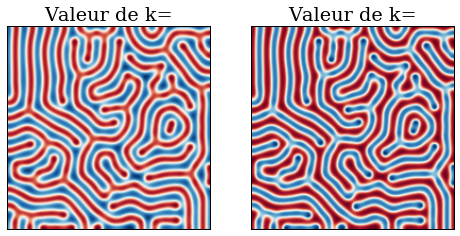

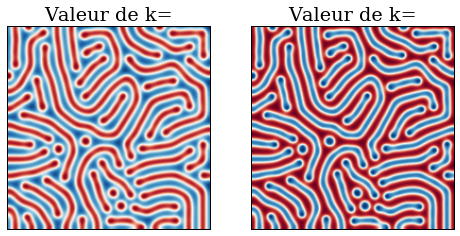

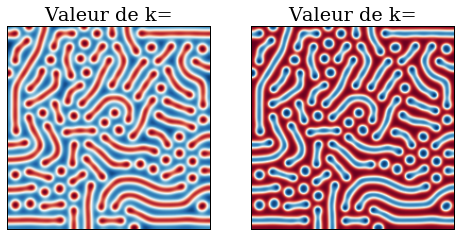

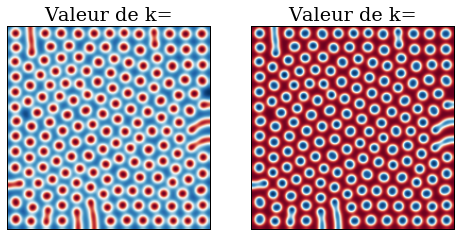

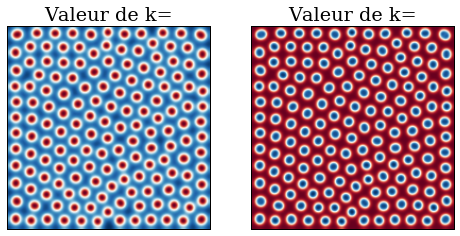

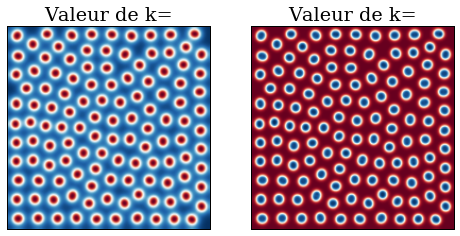

In [13]:
for i in range(6):
    q=k[i]
    Du, Dv, F = 0.00016, 0.00008, 0.035  
    c1= Du*dt/(dh)**2
    c2= Dv*dt/(dh)**2

    uvinitial = numpy.load('./data/uvinitial.npz')
    U = uvinitial['U']
    V = uvinitial['V']

    d = ftcs(U, V, nt, c1, c2, F, q, dt)
    u = d[0]
    v = d[1]

    fig = pyplot.figure(figsize=(8,5))
    pyplot.subplot(121)
    pyplot.title("Valeur de k=")
    pyplot.imshow(u, cmap = cm.RdBu)
    pyplot.xticks([]), pyplot.yticks([]);
    pyplot.subplot(122)
    pyplot.title("Valeur de k=")
    pyplot.imshow(v, cmap = cm.RdBu)
    pyplot.xticks([]), pyplot.yticks([])

Que se passe t'il si on fait varier F ?

In [14]:
F = numpy.array([0.005,0.015,0.030,0.033,0.034,0.035])

In [15]:
def ftcs(U, V, nt, c1, c2, f, k, dt):
    
    for n in range(nt):
        Un = U.copy()
        Vn = V.copy()
        
        U[1:-1,1:-1] = c1*(Un[1:-1,2:] + Un[1:-1,:-2] + Un[2:,1:-1] + Un[:-2,1:-1]) + (1-4*c1-dt*(Vn[1:-1,1:-1])**2-dt*f)* Un[1:-1,1:-1]+ dt*f
       
        V[1:-1,1:-1] = c2*(Vn[1:-1,2:] + Vn[1:-1,:-2] + Vn[2:,1:-1] + Vn[:-2,1:-1]) + ((1-4*c2-dt*(f+k))* Vn[1:-1,1:-1]) + (dt*Un[1:-1,1:-1]*((Vn[1:-1,1:-1])**2))
  
        # Enforce Neumann BCs
    
        # Bord supérieur
        U[-1,:] = U[-2,:]
        V[-1,:] = V[-2,:]
        
        # Bord inférieur
        U[0,:]  = U[1,:]
        V[0,:]  = V[1,:]
        
        # Bord droit
        U[:,-1] = U[:,-2]
        V[:,-1] = V[:,-2]
        
        # Bord gauche
        U[:,0]  = U[:,1]
        V[:,0]  = V[:,1]
       
    e1 = U 
    e2 = V
    return numpy.array([e1,e2])

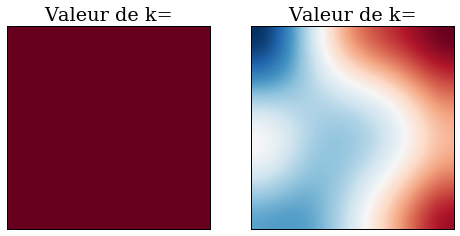

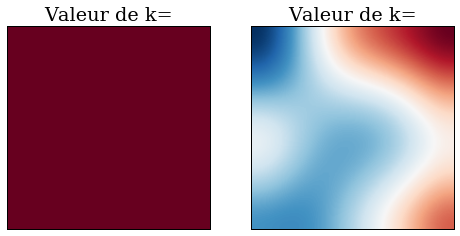

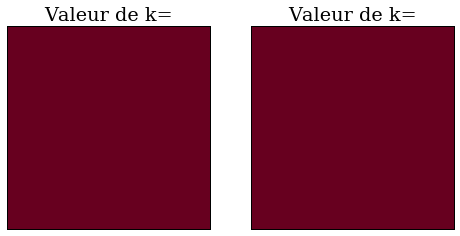

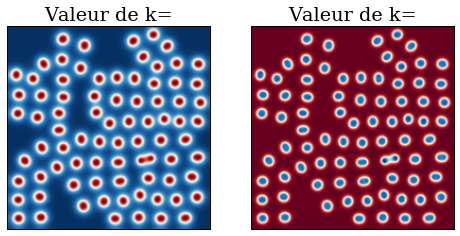

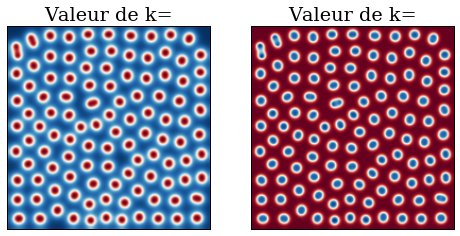

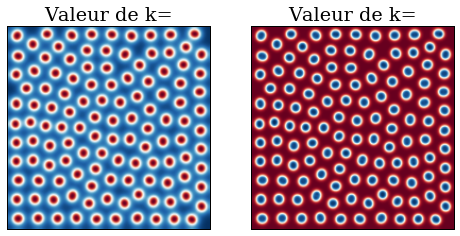

In [16]:
for i in range(6):
    f=F[i]
    Du, Dv, k = 0.00016, 0.00008, 0.065  
    c1= Du*dt/(dh)**2
    c2= Dv*dt/(dh)**2

    uvinitial = numpy.load('./data/uvinitial.npz')
    U = uvinitial['U']
    V = uvinitial['V']

    d = ftcs(U, V, nt, c1, c2, f, k, dt)
    u = d[0]
    v = d[1]
    
    fig = pyplot.figure(figsize=(8,5))
    pyplot.subplot(121)
    pyplot.title("Valeur de k=")
    pyplot.imshow(u, cmap = cm.RdBu)
    pyplot.xticks([]), pyplot.yticks([]);
    pyplot.subplot(122)
    pyplot.title("Valeur de k=")
    pyplot.imshow(v, cmap = cm.RdBu)
    pyplot.xticks([]), pyplot.yticks([])

Phénomène non-linéaire très sensible au changement des paramètres. On peut ne peut donc pas vraiment en déduire des propriétes générales. Par contre, pour certaine valeurs de F et k, on peut retrouver des patterns similaires à ceux présent dans le règne animal ou des situation physique biologique tel que la division cellulaire (lorsqu'on utilise une annimation). 

 Pour le voir, voici le lien d'une une annimation intéractive, où l'on peut changer les paramètres du problème: https://pmneila.github.io/jsexp/grayscott/ 
 
 En utilisant les paramètres de notre problème (F=0.035  et k=0.065), on observe bien un phénomène semblable à la division cellulaire.

---

##### 5. Animation
---

#### 1ère version " À 1 Dimension"

In [17]:
from matplotlib import animation
from IPython.display import HTML

In [18]:
n  = 192
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 
dh = 5/(n-1)
T  = 8000
dt = .9 * dh**2 / (4*max(Du,Dv))
nt = int(T/dt)
L  = 5

c1 = Du*dt/(dh**2)
c2 = Dv*dt/(dh**2)

In [19]:
L = 5
s_anim = ftcs(U, V, nt, c1, c2, F, k, dt)

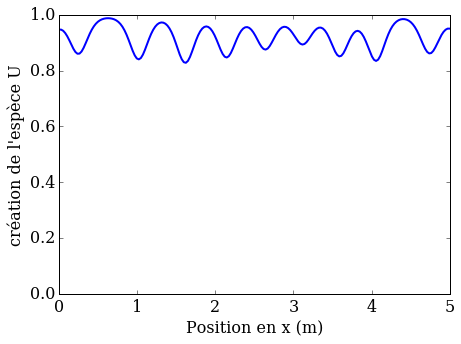

In [30]:
fig = pyplot.figure(figsize=(7,5));
ax = pyplot.axes(xlim=(0,5),ylim=(0,1),xlabel=('Position en x (m)'),ylabel=("création de l'espèce U"));
line, = ax.plot([],[],'b-', lw=2);

def animate(data):
    x = numpy.linspace(0,L,n)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=s_anim[0], interval=50)
HTML(anim.to_html5_video())

#### 2ème version : À 2 dimension "

In [21]:
def ftcs(U, V, nt, c1, c2, F, k, dt):
    
    U_tempo = numpy.empty(int(nt/100),dtype=numpy.ndarray)
    
    for i in range(int(nt/100)):
        U_tempo[i]=numpy.zeros((n,n))
    
    for i in range(nt):
        Un = U.copy()
        Vn = V.copy()
        
        
        U[1:-1,1:-1] = ((1-4*c1-dt*(Vn[1:-1,1:-1])**2-dt*F)* Un[1:-1,1:-1])\
             + c1*(Un[1:-1,2:] + Un[1:-1,:-2] + Un[2:,1:-1] + Un[:-2,1:-1])\
             + (dt*F) 
       
        V[1:-1,1:-1] = ((1-4*c2-dt*(F+k))* Vn[1:-1,1:-1])\
             + (dt*Un[1:-1,1:-1]*((Vn[1:-1,1:-1])**2))\
             + c2*(Vn[1:-1,2:] + Vn[1:-1,:-2] + Vn[2:,1:-1] + Vn[:-2,1:-1])
        
        # On impose des conditions aux bords de Neumann
    
        # Bord supérieur
        U[-1,:] = U[-2,:]
        V[-1,:] = V[-2,:]
        
        # Bord inférieur
        U[0,:]  = U[1,:]
        V[0,:]  = V[1,:]
        
        # Bord droit
        U[:,-1] = U[:,-2]
        V[:,-1] = V[:,-2]
        
        # Bord gauche
        U[:,0]  = U[:,1]
        V[:,0]  = V[:,1]

        if i in numpy.arange(0,(nt-100),100):
            U_tempo[int(i/100)] = U.copy()
        
    return U_tempo

In [22]:
uvinitial = numpy.load('./data/uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

s = ftcs(U, V, nt, c1, c2, F, k, dt)

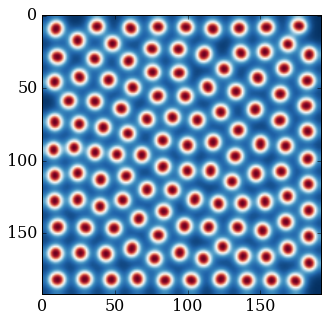

In [23]:
fig = pyplot.figure(figsize=(5,7));
ims = []

for i in range(int(nt/100)):
    im = pyplot.imshow(s[i], cmap= cm.RdBu, animated=True)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
HTML(anim.to_html5_video())

In [24]:
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish

uvinitial = numpy.load('./data/uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

s = ftcs(U, V, nt, c1, c2, F, k, dt)

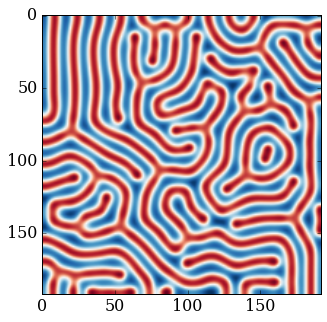

In [25]:
fig = pyplot.figure(figsize=(5,7));
ims = []

for i in range(int(nt/100)):
    im = pyplot.imshow(s[i], cmap= cm.RdBu, animated=True)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
HTML(anim.to_html5_video())

---

##### 5. Sources
---

animation

[1] http://matplotlib.org/examples/animation/dynamic_image.html

zebra fish

[2] http://effegua.myphotos.cc/PHP/Display_foto_Web.php?foto=Arothron%20mappa%20(pesce%20palla%20mappa)%20-%20Maldive.jpg&dir=../Maldive/Subacquee&lingua=italiano


---
###### La cellule ci-dessous charge le style du notebook.

In [26]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())